# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

### 3. Training time!

In [2]:
from datetime import datetime
from MADDPG.driver import plot_results, train
from MADDPG.maddpg_agent import MADDPGAgent
from main import init_config_obj
from types import SimpleNamespace

#### Run 1

In [3]:
current_config = {
    "seed": 7,
    "buffer_size": int(1e6),
    "discount": 0.99,
    "target_mix": 5e-2,
    "lr_actor": 5e-4,
    "lr_critic": 5e-4,
    "learn_every": 2,
    "learn_number": 1,
    "epsilon": 1,
    "epsilon_decay": 1,
    "batch_size": 512,
    "reacher_fp": "Tennis_Windows_x86_64/Tennis.exe",
    "ou_noise_mu": 0., 
    "ou_noise_sigma": 0.2, 
    "ou_noise_theta": 0.15,
    "fc1_units": 512,
    "fc2_units": 256,
    "max_episodes": 2000,
    "add_noise": True
}

In [4]:
complete_config = init_config_obj(SimpleNamespace(**current_config))
maddpg = MADDPGAgent(cnfg=complete_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [5]:
cur_ts = str(datetime.now().timestamp())


Environment solved in 1342 episodes!	Average Score: 0.50


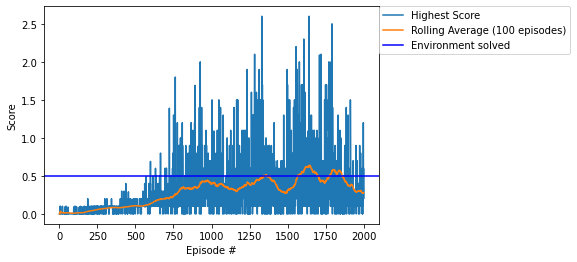

In [6]:
scores_total, rolling_score_averages = train(maddpg, complete_config, cur_ts, total_episodes=complete_config.max_episodes)
plot_results(scores_total, rolling_score_averages, save_to_fn="p3_agent_training_scores_" + cur_ts + ".png")

In [7]:
complete_config.env.close()

#### Run 2
Reduce noise amplitude and add reduce noise altogether at later training stages.

In [3]:
cur_ts = str(datetime.now().timestamp())

In [4]:
current_config = {
    "seed": 7,
    "buffer_size": int(1e6),
    "discount": 0.99,
    "target_mix": 5e-2,
    "lr_actor": 5e-4,
    "lr_critic": 5e-4,
    "learn_every": 2,
    "learn_number": 1,
    "epsilon": 1,
    "epsilon_decay": .99,
    "batch_size": 512,
    "reacher_fp": "Tennis_Windows_x86_64/Tennis.exe",
    "ou_noise_mu": 0., 
    "ou_noise_sigma": 0.05,
    "ou_noise_theta": 0.15,
    "fc1_units": 512,
    "fc2_units": 256,
    "max_episodes": 2000,
    "add_noise": True
}

In [5]:
complete_config = init_config_obj(SimpleNamespace(**current_config))
maddpg = MADDPGAgent(cnfg=complete_config)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [6]:
scores_total, rolling_score_averages = train(maddpg, complete_config, cur_ts, total_episodes=complete_config.max_episodes)
plot_results(scores_total, rolling_score_averages, save_to_fn="p3_agent_training_scores_" + cur_ts + ".png")


Environment solved in 1012 episodes!	Average Score: 0.52


KeyboardInterrupt: 

We have interrupted the above as the rolling average looks healthy after solving the environment. Let's verify this visually using the saved scores' file.

In [10]:
def import_score_files(scores_fp, rolling_avgs_fp):
    scores_total = []
    rolling_score_averages = []
    
    with open(scores_fp, 'r') as f:
        for line in f:
            scores_total.append(float(line))
            
    f.close()
    
    with open(rolling_avgs_fp, 'r') as f:
        for line in f:
            rolling_score_averages.append(float(line))
    
    f.close()
    
    return scores_total, rolling_score_averages

In [11]:
scores_total, rolling_score_averages = import_score_files("scores_chkpnt_1587029263.532555.txt", 
                                                          "rolling_averages_chkpnt_1587029263.532555.txt")

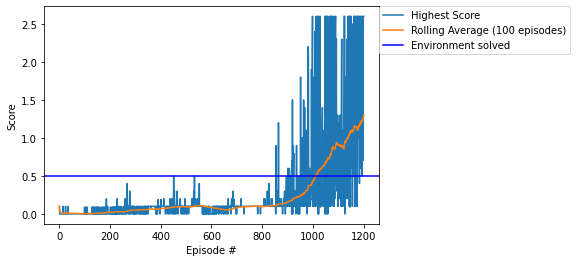

In [12]:
plot_results(scores_total, rolling_score_averages, save_to_fn="p3_agent_training_scores_" + cur_ts + ".png")

In [13]:
complete_config.env.close()